The nx graph of the math genealogy project is explored

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pickle
import networkx as nx
import nltk

In [2]:
carpeta_datos =  '..\\Data\\nx_data\\'

nombre_grafo = "genealogy_nx_graph.json"

### Leer el grafo

In [3]:
with open(carpeta_datos + nombre_grafo, 'rb') as f:
    grafo = pickle.load(f)

### Ver info basica

In [4]:
# responder preguntas basicas
num_nodos = grafo.number_of_nodes()
num_aristas = grafo.number_of_edges()

print(f"Se tienen {num_nodos} nodos")
print(f"Se tienen {num_aristas} aristas")

Se tienen 297377 nodos
Se tienen 329209 aristas


In [5]:
# no es directed acyclic graph
# pues se consideran edges de todos los advisors
nx.is_directed_acyclic_graph(grafo)

False

In [8]:
# obtener una lista de los grados
lista_grados = np.array([grafo.degree(node) for node in grafo.nodes])

# grados mayor y menor
grado_max = lista_grados.max()
grado_min = lista_grados.min()

grado_promedio = lista_grados.mean()

# imprimir
print(f"El grado maximo es: {grado_max}")
print(f"El grado minimo es: {grado_min}")
print(f"El grado promedio es: {grado_promedio}")

El grado maximo es: 171
El grado minimo es: 0
El grado promedio es: 2.2140851511717448


In [9]:
# obtener numero de estudiantes
# eso es out degree

lista_grados_out = np.array([grafo.out_degree(node) for node in grafo.nodes])

# grados mayor y menor
grado_max_out = lista_grados_out.max()
grado_min_out = lista_grados_out.min()

grado_promedio_out = lista_grados_out.mean()

# imprimir
print("El grado de salida es el numero de estudiantes")
print(f"El grado maximo de salida es: {grado_max_out}")
print(f"El grado minimo de sallida es: {grado_min_out}")
print(f"El grado promedio de salida es: {grado_promedio_out}")

El grado de salida es el numero de estudiantes
El grado maximo de salida es: 169
El grado minimo de sallida es: 0
El grado promedio de salida es: 1.1070425755858724


In [10]:
# ver para cuantos es 0
n0_num_nodos_out_grado_0 = sum(lista_grados_out==0)

# ver el porcentaje
print(f"El {round(100*n0_num_nodos_out_grado_0/len(lista_grados_out), 2)}% de los matematicos no tiene estudiantes")

El 75.45% de los matematicos no tiene estudiantes


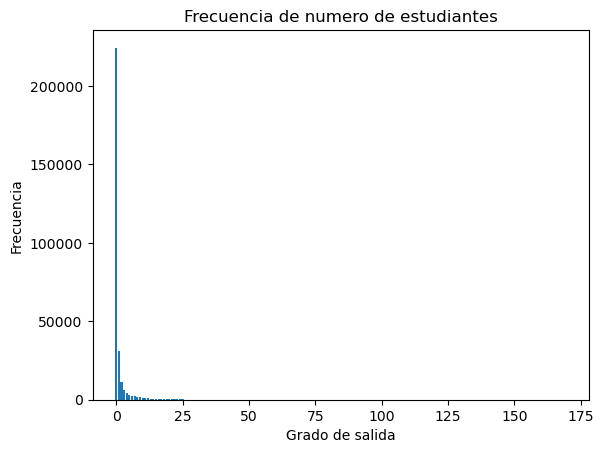

In [11]:
# sacar frecuencias
frecuencias_grados = nltk.FreqDist(lista_grados_out)

# tomar lss tamaños y las frecuencias
grados_out, frecuencias = zip(*frecuencias_grados.items())

# hacer la grafica
plt.bar(grados_out, frecuencias)
plt.xlabel("Grado de salida")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de numero de estudiantes")
plt.show()

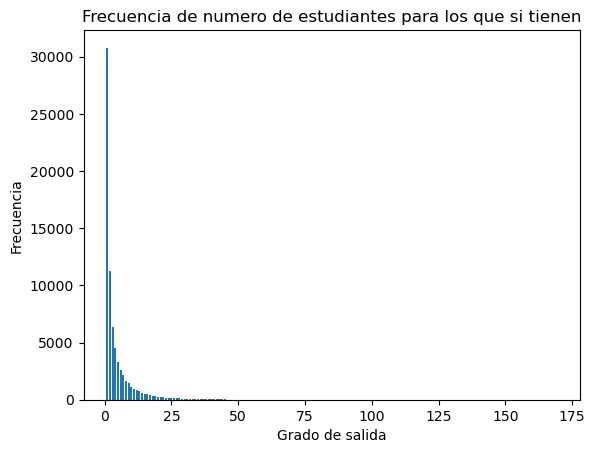

In [12]:
# solo tomar los matematicos que si tiene estudiantes
lista_grados_out_no0 = np.array([g for g in lista_grados_out if g != 0])


# sacar frecuencias
frecuencias_grados = nltk.FreqDist(lista_grados_out_no0)

# tomar lss tamaños y las frecuencias
grados_out, frecuencias = zip(*frecuencias_grados.items())

# hacer la grafica
plt.bar(grados_out, frecuencias)
plt.xlabel("Grado de salida")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de numero de estudiantes para los que si tienen")
plt.show()

In [13]:
# obtener numero de advisors
# eso es in degree

lista_grados_in = np.array([grafo.in_degree(node) for node in grafo.nodes])

# grados mayor y menor
grado_max_in = lista_grados_in.max()
grado_min_in = lista_grados_in.min()

grado_promedio_in = lista_grados_in.mean()

# imprimir
print("El grado de entrada es el numero de advisors")
print(f"El grafo maximo de entrada es: {grado_max_in}")
print(f"El grafo minimo de entrada es: {grado_min_in}")
print(f"El grado promedio de entrada es: {grado_promedio_in}")

El grado de entrada es el numero de advisors
El grafo maximo de entrada es: 6
El grafo minimo de entrada es: 0
El grado promedio de entrada es: 1.1070425755858724


In [14]:
# ver para cuantos es 0
n0_num_nodos_in_grado_0 = sum(lista_grados_in==0)

# ver el porcentaje
print(f"El {round(100*n0_num_nodos_in_grado_0/len(lista_grados_in), 2)}% de los matematicos no tiene advisors")

El 8.54% de los matematicos no tiene advisors


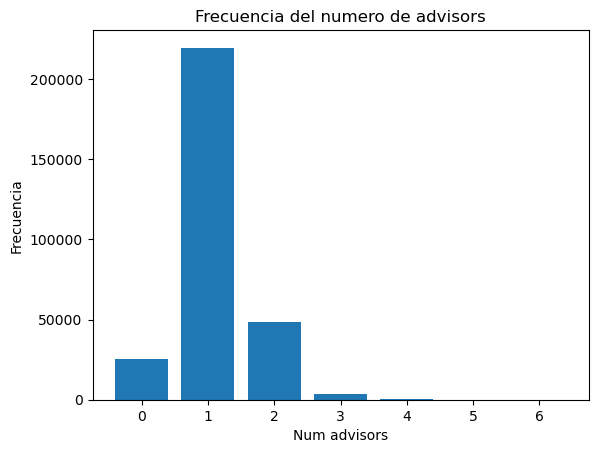

In [15]:
# histograma de numero de advisors
frecuencias_advisors = nltk.FreqDist(lista_grados_in)

# tomar los valores y las frecuencias
valores, frecuencias = zip(*frecuencias_advisors.items())

# hacer la grafica
plt.bar(valores, frecuencias)
plt.xlabel("Num advisors")
plt.ylabel("Frecuencia")
plt.title("Frecuencia del numero de advisors")
plt.show()

In [16]:
# ver para cuantos es igual o menor que 2
num_nodos_in_grado_menor_igual_2 = sum(lista_grados_in<=2)

# ver el porcentaje
print(f"El {round(100*num_nodos_in_grado_menor_igual_2/len(lista_grados_in), 2)}% de los matematicos tiene a los mas dos advisors")

El 98.58% de los matematicos tiene a los mas dos advisors


In [17]:
# nodos aislados
nodos_aislados = list(nx.isolates(grafo))
num_nodos_aislados = len(nodos_aislados)

# componentes debilemente conectados
# es decir, conectados si quitas direcion
num_componentes = nx.number_weakly_connected_components(grafo)

print("Número de nodos aislados:", num_nodos_aislados)
print("Número de componentes conectadas:", num_componentes)

Número de nodos aislados: 9192
Número de componentes conectadas: 13411


In [18]:
# tomar los componentes debilmente conectados
componentes = list(nx.weakly_connected_components(grafo))
tamano_componentes = [len(componente) for componente in componentes]
tamano_componente_gigante = max(tamano_componentes)
porcentaje_componente_gigante = (tamano_componente_gigante / len(grafo)) * 100

# Imprimir resultados
print("Tamaño del componente gigante:", tamano_componente_gigante)
print("Porcentaje del componente gigante:", round(porcentaje_componente_gigante, 2), "%")

Tamaño del componente gigante: 273674
Porcentaje del componente gigante: 92.03 %


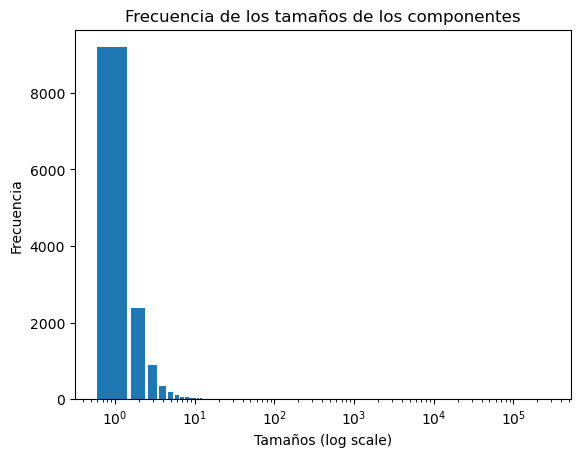

In [19]:
# sacar frecuencias
frecuencias_t = nltk.FreqDist(tamano_componentes)

# tomar lss tamaños y las frecuencias
tamaños, frecuencias = zip(*frecuencias_t.items())

# hacer la grafica
plt.bar(tamaños, frecuencias)
plt.xlabel("Tamaños (log scale)")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de los tamaños de los componentes")
plt.xscale('log')

plt.show()

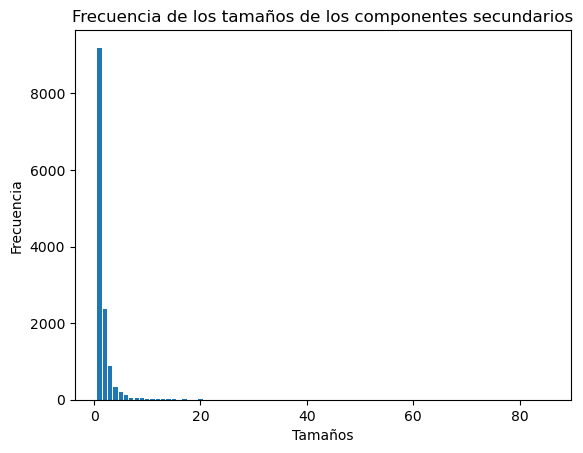

In [20]:
# histograma de los tamaños sin considerar el mayor
tamaños_componentes_pequeños = [t for t in tamano_componentes if t != tamano_componente_gigante]

# sacar frecuencias
frecuencias_t = nltk.FreqDist(tamaños_componentes_pequeños)

# tomar lss tamaños y las frecuencias
tamaños_pequeños, frecuencias = zip(*frecuencias_t.items())

# hacer la grafica
plt.bar(tamaños_pequeños, frecuencias)
plt.xlabel("Tamaños")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de los tamaños de los componentes secundarios")
plt.show()

In [21]:
densidad = grado_promedio/(num_nodos-1)

print(f"El grafo tiene densidad de {densidad}")

El grafo tiene densidad de 7.4454063245579495e-06


## Ver un atributo especifico

In [22]:
# frecuencias de algun atributo de los nodos
def proporcion_frecuencias_atributo(nombre_atributo):
    
    # tomar todos los atributos
    lista_atributos = [datos_nodo[nombre_atributo] if datos_nodo[nombre_atributo] is not None else "None" 
                       for nodo, datos_nodo in grafo.nodes.data()]

    # sacar frecuencias de los atributos
    frecuencias_at = nltk.FreqDist(lista_atributos)

    # hacer una lista de frecuencia y atributo
    lista_frecuencias_atributos = [[int(f), a] for a, f in frecuencias_at.items()]

    # ordenar desde la frecuencia mayor
    lista_frecuencias_atributos = sorted(lista_frecuencias_atributos, reverse=True)

    # añadir los porcentajes
    lista_porcentajes_frecuencias_atributos = [[f/len(lista_atributos), f, a] for f, a in lista_frecuencias_atributos]

    return lista_porcentajes_frecuencias_atributos

In [23]:
proporcion_frecuencias_atributo("country")

[[0.4401214619826012, 130882, 'UnitedStates'],
 [0.11960239023192783, 35567, 'Germany'],
 [0.05526654717748851, 16435, 'UnitedKingdom'],
 [0.052879005437542245, 15725, 'None'],
 [0.04425695329497574, 13161, 'France'],
 [0.031064944498061384, 9238, 'Netherlands'],
 [0.02849245234164041, 8473, 'Canada'],
 [0.018084787996381697, 5378, 'Russia'],
 [0.015115493128251344, 4495, 'Switzerland'],
 [0.014802758787666834, 4402, 'Spain'],
 [0.011029770291582738, 3280, 'Italy'],
 [0.010999505677977786, 3271, 'Brazil'],
 [0.010955790124992855, 3258, 'India'],
 [0.010861633549333002, 3230, 'Australia'],
 [0.009099560490555759, 2706, 'China'],
 [0.008961688361910976, 2665, 'Poland'],
 [0.007828446719147748, 2328, 'Belgium'],
 [0.007650221772363027, 2275, 'Austria'],
 [0.007609868954223091, 2263, 'Sweden'],
 [0.007192889833443743, 2139, 'Ukraine'],
 [0.007098733257783891, 2111, 'Israel'],
 [0.005242503623346795, 1559, 'Japan'],
 [0.005148347047686943, 1531, 'Iran'],
 [0.004105899245738574, 1221, 'Finla

In [24]:
proporcion_frecuencias_atributo("subject")

[[0.3841487404876638, 114237, 'None'],
 [0.10389841850580239, 30897, '68—Computer science'],
 [0.06532784983371276,
  19427,
  '91—Game theory, economics, social and behavioral sciences'],
 [0.05385419854259072, 16015, '62—Statistics'],
 [0.02501538451191585, 7439, '65—Numerical analysis'],
 [0.02316251761232375, 6888, '60—Probability theory and stochastic processes'],
 [0.021313013447576645, 6338, '35—Partial differential equations'],
 [0.018599286427665892,
  5531,
  '90—Operations research, mathematical programming'],
 [0.01581494197601025, 4703, '94—Information and communication, circuits'],
 [0.015458492082440807, 4597, '11—Number theory'],
 [0.014893552628481691, 4429, '92—Biology and other natural sciences'],
 [0.014459759833477371, 4300, '05—Combinatorics'],
 [0.013319792721024154, 3961, '76—Fluid mechanics'],
 [0.013279439902884218, 3949, '81—Quantum Theory'],
 [0.012462295335550497, 3706, '14—Algebraic geometry'],
 [0.011863728533141433, 3528, '03—Mathematical logic and found

In [25]:
proporcion_frecuencias_atributo("year")

[[0.18231403235623467, 54216, 'None'],
 [0.02145088557622143, 6379, '2013'],
 [0.02109443568265199, 6273, '2012'],
 [0.020680819296717636, 6150, '2015'],
 [0.020593388190747772, 6124, '2011'],
 [0.020546309902917843, 6110, '2014'],
 [0.02033109487283818, 6046, '2010'],
 [0.01962828329023428, 5837, '2016'],
 [0.019574479532714364, 5821, '2005'],
 [0.01950722483581447, 5801, '2008'],
 [0.019224755108834913, 5717, '2007'],
 [0.019154137677090025, 5696, '2006'],
 [0.019016265548445238, 5655, '2017'],
 [0.018340355844601298, 5454, '2018'],
 [0.017819131943627112, 5299, '2009'],
 [0.017324809921412887, 5152, '2000'],
 [0.017069242073193287, 5076, '2019'],
 [0.016928007209703506, 5034, '2004'],
 [0.016860752512803612, 5014, '1998'],
 [0.016349616816364414, 4862, '1996'],
 [0.016289087589154507, 4844, '1997'],
 [0.016215107422564625, 4822, '2003'],
 [0.016053696150004876, 4774, '1999'],
 [0.015919186756205086, 4734, '2002'],
 [0.01578804009725029, 4695, '2001'],
 [0.015142395007011302, 4503, '

In [26]:
proporcion_frecuencias_atributo("school")

[[0.16479082107896711, 49005, 'None'],
 [0.02091284800102227, 6219, ''],
 [0.01965518516899424, 5845, 'Massachusetts Institute of Technology'],
 [0.01957784226755936, 5822, 'University of California, Berkeley'],
 [0.014987709204141544, 4457, 'Stanford University'],
 [0.012489197214310454, 3714, 'University of Wisconsin-Madison'],
 [0.011587984275851865, 3446, 'University of Illinois at Urbana-Champaign'],
 [0.011053309435497701, 3287, 'Harvard University'],
 [0.010777565178208133, 3205, 'University of Michigan'],
 [0.009577068838545012, 2848, 'Princeton University'],
 [0.009402206626605285, 2796, 'University of California, Los Angeles'],
 [0.008137818324887264, 2420, 'Cornell University'],
 [0.008060475423452385, 2397, 'The University of Chicago'],
 [0.008036936279537422, 2390, 'Purdue University'],
 [0.00787888774182267, 2343, 'University of Minnesota - Twin Cities'],
 [0.007707388264727938, 2292, 'University of Texas at Austin'],
 [0.007687211855657969, 2286, 'University of Cambridge